In [1]:
!pip install torch==1.5.0+cu101 torchvision==0.6.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html


In [2]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [3]:
!pip install cython pyyaml==5.1

# COCO is a large image dataset designed for object detection, segmentation, person keypoints detection, stuff segmentation, etc.
# This package provides Python APIs that assists in loading, parsing, and visualizing the annotations in COCO. Here, we will be 
# installing this package from GitHub.

!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

     |████████████████████████████████| 276kB 3.5MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp36-cp36m-linux_x86_64.whl size=44074 sha256=584315c6dd9f06bdfc244309c4eda1031977b93bab257c3cdf74396b127ddea1
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built pyyaml
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-60gvenzd
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-60gvenzd
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=267010 sha256=5f321a992ee46da8f0b2054a2a28332b1403e3d5ceb93defc2cb7802c226e5e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5wojlahw/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing install

In [4]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

!gcc --version

1.5.0+cu101 True
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [5]:
# Installing Detectron2: An open-source library for object detection and segmentation created by the Facebook AI Research team (FAIR)

!pip install detectron2==0.1.3 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.5/index.html
     |████████████████████████████████| 6.2MB 672kB/s 
  Created wheel for fvcore: filename=fvcore-0.1.1.post20200612-cp36-none-any.whl size=41026 sha256=cb08daa58bb59be509af1a548b81b47a0c14f94e9f2b1128fc508e792c75f2e9
  Stored in directory: /root/.cache/pip/wheels/2e/d1/2d/e8068900f03da2c84c32ac0d973b8bf73b2ffa9c3686771443
Successfully built fvcore


In [0]:
### Import libraries ###

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import some common libraries

import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

# Import some common utilities from Detectron2

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [7]:
### Read a video and save frames to a folder ###

%%time
!rm -r frames/*
!mkdir frames/

video = "drive/My Drive/sample_new.mp4"

# Capture Video
cap= cv2.VideoCapture(video)
count=0

if(cap.isOpened()== False):
  print("Error opening the video stream...")

ret, first_frame = cap.read()

while(cap.isOpened()):

  #Capture frame-by-frame
  ret, frame = cap.read()

  if ret== True:

    #Save each frame to the directory
    cv2.imwrite('frames/'+str(count)+'.png', frame)
    count = count + 1

    if count==750:
      break

  else:
    break

rm: cannot remove 'frames/*': No such file or directory
CPU times: user 22.4 s, sys: 958 ms, total: 23.4 s
Wall time: 25.9 s


In [8]:
## Checking the Frame Rate of a video ##

FPS= cap.get(cv2.CAP_PROP_FPS)
print(FPS)

30.0


In [9]:
## Downloading the pre-trained model for Object Detection from Detectron2’s Model Zoo.

cfg = get_cfg()

cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.9  # set threshold for this model

# Finding a model from Detectron2's Model Zoo.
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_R_50_C4_3x.yaml")
predictor = DefaultPredictor(cfg)

model_final_f97cb7.pkl: 136MB [00:06, 21.2MB/s]                           


In [0]:
###  Now, we read a random image & pass it to the model for predictions  ###

img = cv2.imread("frames/415.png")

outputs = predictor(img)

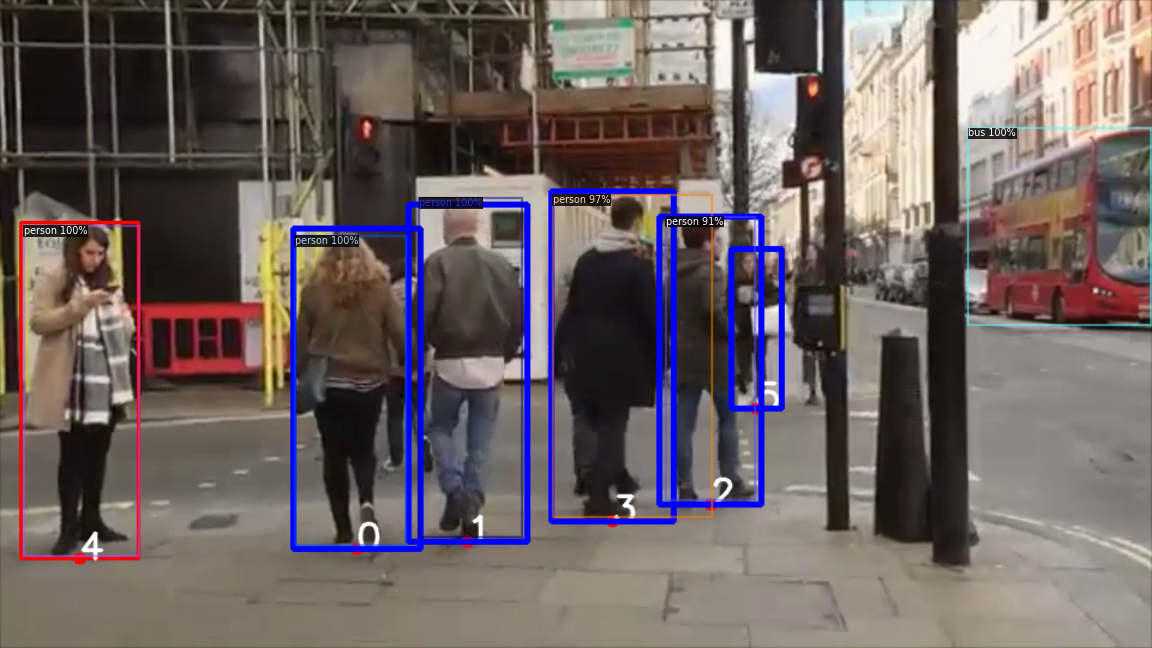

In [31]:
# We use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image()[:, :, ::-1])

In [32]:
# Understanding the objects present in an image
classes = outputs['instances'].pred_classes.cpu().numpy()
print(classes)

[5 0 0 0 0 0]


In [33]:
# Understanding the bounding boxes of an object
bbox = outputs['instances'].pred_boxes.tensor.cpu().numpy()
print(bbox)

[[807.0448   107.782166 959.0791   271.03848 ]
 [245.62344  197.24603  338.29813  454.3827  ]
 [ 19.78379  188.86865  116.14349  463.60303 ]
 [349.40253  165.6261   435.15012  447.29272 ]
 [460.54956  163.23016  593.347    431.15173 ]
 [554.60223  181.22458  629.55475  417.05228 ]]


In [34]:
# Identifying classes and bounding boxes related to only people.

#Identify persons
per = np.where(classes==0)[0]

#Locate the boxes
person = bbox[per]

#Total no. of persons
num = len(person)

print(num)

5


In [35]:
# Format of the Bounding Box
(x1, x2, y1, y2) = person[2]
print(x1, y1, x2, y2)

349.40253 435.15012 165.6261 447.29272


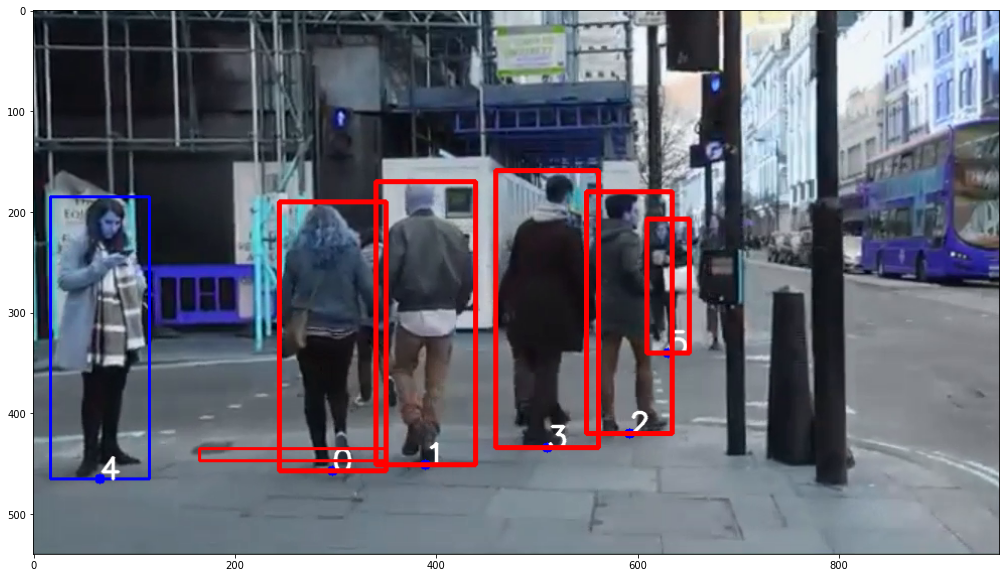

In [36]:
# Let us verify by drawing a bounding box over one of the persons.
img = cv2.imread('frames/415.png')
_= cv2.rectangle(img, (x1,y1), (x2,y2), (255, 0, 0), 2)

plt.figure(figsize=(20,10))
plt.imshow(img)

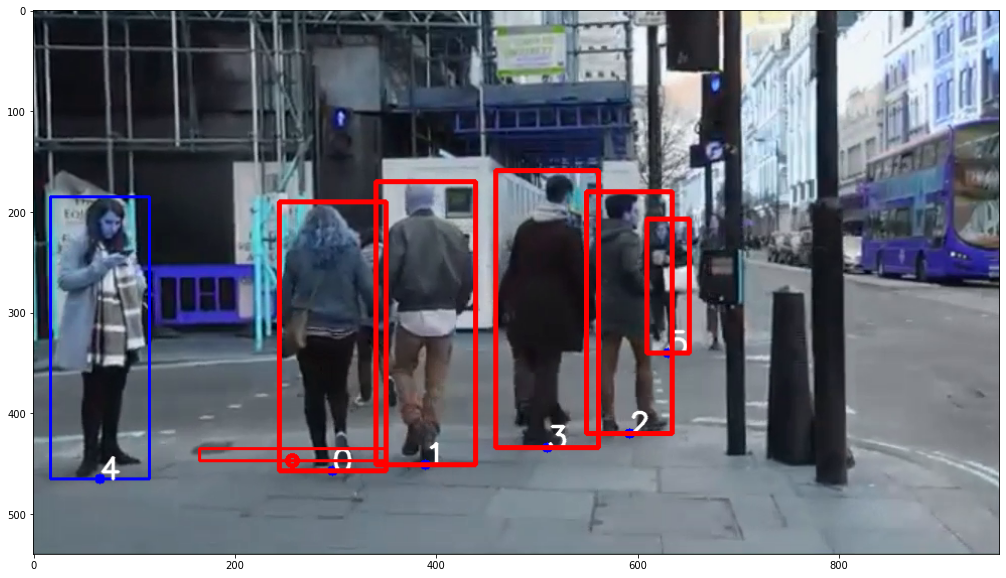

In [37]:
#Compute center of image
x_center = int((x1+x2)/2)
y_center = int(y2)

center = (x_center, y_center)

_=cv2.circle(img, center, 5, (255,0,0), 3)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
# Defining a function that returns the bottom center of every block.

def mid_cal(img, person, ind):
  x1,y1,x2,y2 = person[ind]
  _ = cv2.rectangle(img, (x1, y1), (x2, y2), (0,0,255), 2)

  x_mid = int((x1+x2)/2)
  y_mid = int(y2)
  mid = (x_mid,y_mid)

  _= cv2.circle(img, mid, 5, (0,0,255), -1)
  cv2.putText(img, str(ind), mid, cv2.FONT_HERSHEY_SIMPLEX,1, (255, 255, 255), 2, cv2.LINE_AA)

  return mid

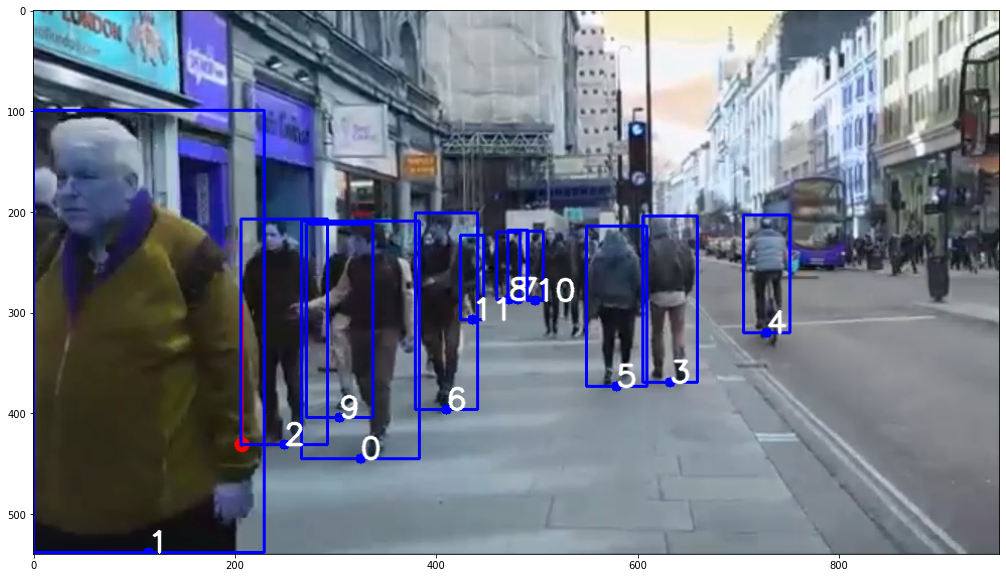

In [19]:
# Calling the function

mid_pt = [mid_cal(img, person, i) for i in range(len(person))]

#visualize
plt.figure(figsize=(20,10))
plt.imshow(img)

In [20]:
# Computing the Euclidian Distance between two objects' bboxes' mid-points within an image.

%%time
from scipy.spatial import distance
def compute_distance(midpoints,num):
  dist = np.zeros((num,num))
  for i in range(num):
    for j in range(i+1,num):
      if i!=j:
        dst = distance.euclidean(midpoints[i], midpoints[j])
        dist[i][j]=dst
  return dist

CPU times: user 75.9 ms, sys: 16.1 ms, total: 92 ms
Wall time: 104 ms


In [0]:
dist_new = compute_distance(mid_pt,num)

In [22]:
# Function that returns the closest people based on the given 'proximity distance'.

%%time
def find_closest(dist,num,thresh):
  p1=[]
  p2=[]
  d=[]
  for i in range(num):
    for j in range(i,num):
      if( (i!=j) & (dist[i][j]<=thresh)):
        p1.append(i)
        p2.append(j)
        d.append(dist[i][j])
  return p1,p2,d

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 10.3 µs


In [23]:
# Setting the threshold for proximity distance.

import pandas as pd

thresh = 100
p1, p2, d = find_closest(dist_new, num, thresh)
df=pd.DataFrame({"p1":p1,"p2":p2,"distance":d})
df

,p1,p2,distance
0,0,2,77.278716
1,0,6,98.112181
2,0,9,46.065171
3,2,9,61.269895
4,3,5,53.150729
5,6,11,92.720009
6,7,8,9.000000
7,7,10,17.029386
8,7,11,49.244289
9,8,10,26.019224


In [0]:
# Function to change the color of people's bboxes who are within a proximity distance to Red.

def risky(img, person, p1, p2):
  range_num = np.unique(p1+p2)
  for i in range_num:
    x1,y1,x2,y2 = person[i]
    _=cv2.rectangle(img, (x1,y1), (x2,y2), (255,0,0), 3)
  return img

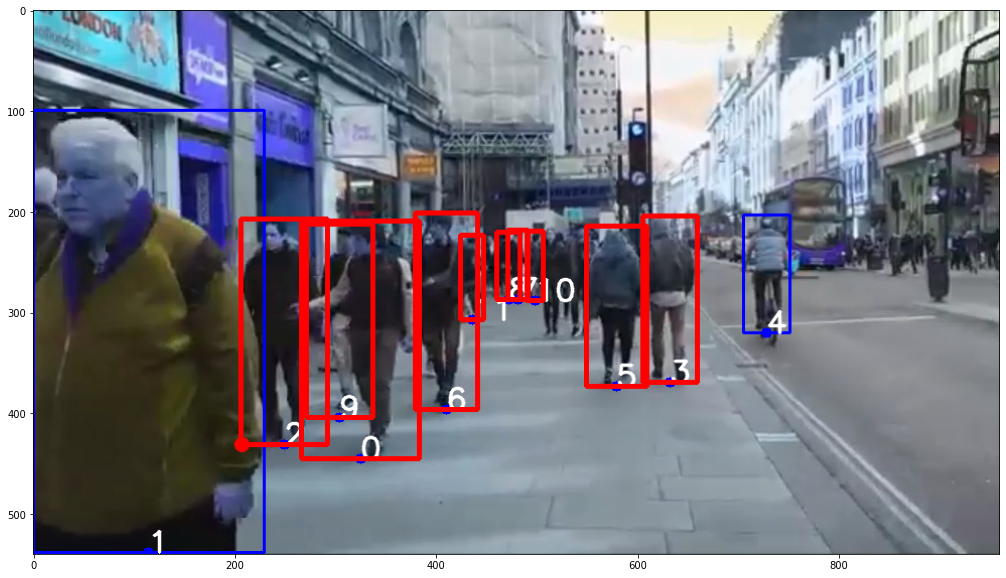

In [25]:
img = risky(img, person, p1, p2)

plt.figure(figsize=(20,10))
plt.imshow(img)

In [0]:
# Carrying out the above operations on all frames of the video.

import os     #for OS functionality
import re     #for RegExp

names = os.listdir('frames/')
names.sort(key=lambda f: int(re.sub('\D', '', f)))

In [0]:
# Function that unites every functionality we performed so far.

def find_closest_ppl(name, thresh):
  img = cv2.imread('frames/'+name)
  outputs = predictor(img)
  classes = outputs['instances'].pred_classes.cpu().numpy()
  bbox = outputs['instances'].pred_boxes.tensor.cpu().numpy()
  ind = np.where(classes==0)[0]
  person = bbox[ind]
  midpoints = [mid_cal(img, person, i) for i in range(len(person))]
  num = len(midpoints)
  dist = compute_distance(midpoints,num)
  p1, p2, d = find_closest(dist,num,thresh)
  img = risky(img, person, p1, p2)
  cv2.imwrite('frames/'+name,img)

  return 0

In [28]:
from tqdm import tqdm         #For tracking the progress frame-by-frame in real-time
thresh = 100
_=[find_closest_ppl(names[i], thresh) for i in tqdm(range(len(names)))]

100%|██████████| 750/750 [12:02<00:00,  1.04it/s]


In [29]:
# Converting frames back to a video.

%%time
frames = os.listdir('frames/')
frames.sort(key=lambda f: int(re.sub('\D', '', f)))

frame_array=[]

for i in range(len(frames)):

  #Reading each file
  img = cv2.imread('frames/'+frames[i])
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  height, width, layers = img.shape
  size = (width,height)

  #inserting the image into a frame array
  frame_array.append(img)

out = cv2.VideoWriter('sample_output.mp4', cv2.VideoWriter_fourcc(*'DIVX'), 25, size)

for i in range(len(frames)):
  #writing to an image array
  out.write(frame_array[i])
out.release()

CPU times: user 12.5 s, sys: 603 ms, total: 13.1 s
Wall time: 12.8 s
